<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2023-24
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 


In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('./part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [196]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [197]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [282]:
# ANSWER

wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []

######### ADD YOUR CODE HERE ##########

#arrays for the training data
wanna = []
razy = []
startsurf = []

#gets the unique labels
uniqueLabel = train_data['labels'].unique()

#iterates over each label and the training data
for label in uniqueLabel:
    for index, row in train_data.iterrows():
        #if the current label corresponds to the label on the row 
        if row['labels'] == label:
            #gets the co-ord set
            coords = [row['x'],row['y']]
            #appends the co-ords depending on the label
            if label == 'wannacry':
                wanna.append(coords)
            if label == 'razy':
                razy.append(coords)
            if label == 'startsurf':
                startsurf.append(coords)



#gets all the arrays into one list
malwareArrays = [wanna,razy, startsurf]
#loops through each array
for label, array in zip(['wanna', 'razy', 'startsurf'], malwareArrays):
    #initialises the sum variables
    xSum = 0
    ySum = 0
    #loops through the co-ords of each array
    for x, y in array:
        #sums the co-ords
        xSum += x
        ySum += y
    #divides the sum totals by the lenght of the array to find x and y midpoints
    xMid = xSum / len(array)
    yMid = ySum / len(array)
    #turns x and y midpoints into a set of midpoints
    setMid = xMid,yMid
   
    #adds the set of midpoints to the corresponding array
    if label == 'wanna':
        wannacry_centroid = xMid, yMid
    if label == 'razy':
        razy_centroid = xMid, yMid
    else:
        startsurf_centroid = xMid, yMid

#prints the midpoints
print ("Wannacry: ", wannacry_centroid)
print ("Razy: ", razy_centroid)
print ("Startsurf: ", startsurf_centroid)

Wannacry:  (2181660.66, 11087.1)
Razy:  (100505.22, 6158.28)
Startsurf:  (478778.12, 3754.04)
             x        y    labels
0    3114896.0  10815.0  wannacry
1    3436940.0   9551.0  wannacry
2    1812649.0  15343.0  wannacry
3    3067845.0  10541.0  wannacry
4      51591.0  21367.0  wannacry
..         ...      ...       ...
145    78591.0   7734.0      razy
146    80429.0   5114.0      razy
147     2898.0     98.0      razy
148   183376.0   8477.0      razy
149    11580.0   5921.0      razy

[150 rows x 3 columns]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

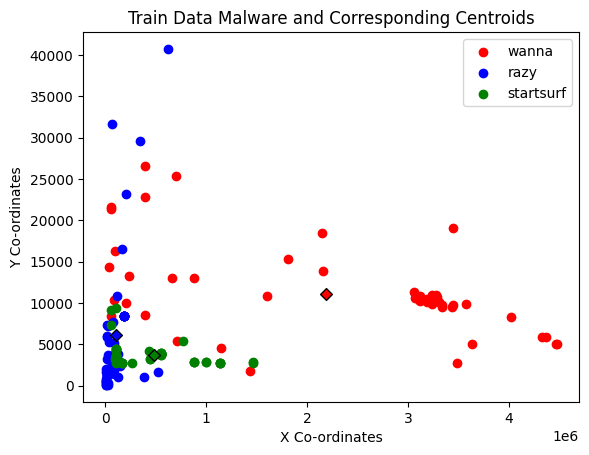

In [199]:
#for the graph
plt.title("Train Data Malware and Corresponding Centroids")
plt.xlabel("X Co-ordinates")
plt.ylabel("Y Co-ordinates")

#dictionary for the array colours
labelColours = {'wanna': 'r', 'razy': 'b', 'startsurf': 'g'}

for label, array in zip(['wanna', 'razy', 'startsurf'], malwareArrays):
    #converts the arrays into numpy to slice
    array = np.array(array)
    #iterates through each array and plots the co-ods with corresponding colour and label
    plt.scatter(array[:, 0],array[:, 1],color=labelColours[label],label=label)

#centroids plotted with different markers
plt.scatter(wannacry_centroid[0],wannacry_centroid[1], marker='D', edgecolors = 'black',color='r')
plt.scatter(razy_centroid[0],razy_centroid[1], marker='D',edgecolors = 'black', color='b')
plt.scatter(startsurf_centroid[0],startsurf_centroid[1], marker='D', edgecolors = 'black',color='g')

#adds a legend
plt.legend()
plt.show()


### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [200]:
# ANSWER
score = 0

for i in range(test_data.shape[0]):
    
    ######### Question 3a - ADD YOUR CODE HERE ##########
    
    #i is the index (0-90)
    distance1 = [] 
    distance2 = [] 
    distance3 = [] 
    
    #convert dataframe to 2d array
    array = test_data.values
    
    #euclidean distance
    distance1 = np.sqrt(np.abs(array[i, 0] - wannacry_centroid[0]) ** 2 + np.abs(array[i, 1] - wannacry_centroid[1]) ** 2)
    distance2 = np.sqrt(np.abs(array[i, 0] - razy_centroid[0]) ** 2 + np.abs(array[i, 1] - razy_centroid[1]) ** 2)
    distance3 = np.sqrt(np.abs(array[i, 0] - startsurf_centroid[0]) ** 2 + np.abs(array[i, 1] - startsurf_centroid[1]) ** 2)

    #combines all the distances into one array
    distances = [distance1, distance2, distance3]
    dist_labels = ['wannacry','razy', 'startsurf']
    
    #prints the euclidena distances calculated
    print(distances)
    
    ######### Question 3b - ADD YOUR CODE HERE ##########

    #gets the minimum value of the distance
    minValCentroid = np.argmin(distances)
    #gets the label of the above value based on the dist_labels where 0 is Wannacry, 1 is Razy, 2 is Startsurf
    labelValCentroid = dist_labels[minValCentroid]

    #get the labels and checks if its the same as the test data label currently in loop
    if labelValCentroid==test_data['labels'].iloc[i]:
        #if True, adds a point to score of successful classifications 
        score += 1

print ("Score:", score)

[703541.8463758682, 1377620.8601285939, 999364.1578196088]
[2127918.71378561, 49164.69964361422, 425377.8214622102]
[1903912.5453918006, 3985062.8085142253, 3606791.030597827]
[466000.48337095685, 2547114.068604287, 2168863.5188046335]
[2289185.0884314016, 4370332.900734992, 3992060.1174737406]
[898809.7855037212, 2979970.47061797, 2601704.8906022557]
[376187.4387653653, 2457348.2599524157, 2079085.7583091988]
[2157417.5278460975, 76319.95830270612, 454566.17143858824]
[1847872.045227149, 233766.07295706277, 145959.72419423106]
[1744425.1678285217, 337088.3225002712, 44976.865285344196]
[227270.98678565538, 2308359.5343722273, 1930108.1193839933]
[552595.2891405118, 1528615.0315405794, 1150376.0022683435]
[152652.60309934334, 1928559.9722703795, 1550306.366301505]
[1018823.026724762, 3099984.2002548603, 2721719.384991975]
[611692.2943871415, 2692812.318686456, 2314538.986143153]
[2130343.4145672866, 51458.947622418396, 427798.43487490225]
[1986450.8649774664, 4067600.7873015325, 368932

### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [201]:
#ANSWER

######### ADD YOUR CODE HERE ##########
#divides the score by the shape of test data (90) and multiply by 100
accuracy = (score/test_data.shape[0])*100
print(f'Accuracy: {accuracy}%')

Accuracy: 70.0%


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [281]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import StandardScaler

#initiates the standard scalar function
standardScalarFunc = StandardScaler()
#scales the features
featuresScaled = standardScalarFunc.fit_transform(features)
print(featuresScaled)

# #turns the features back into dataframe
# featuresScaled = pd.DataFrame(featuresScaled)
# featuresScaled

28000
            0        1        2       3        4       5       6       7    \
0      224862.0  15842.0  12985.0  7387.0  13132.0  5112.0  8661.0  7990.0   
1       21802.0   2127.0   2076.0  2028.0   1871.0  1622.0  1939.0  1502.0   
2       24407.0  11682.0   7189.0  6538.0   7687.0  6848.0  4974.0  5377.0   
3        7132.0    461.0    647.0   371.0    581.0   269.0   646.0   262.0   
4        5321.0   1108.0    985.0   955.0    958.0   890.0   971.0   919.0   
...         ...      ...      ...     ...      ...     ...     ...     ...   
27995   23849.0   1489.0   1573.0  2649.0   1560.0  1025.0   922.0  1020.0   
27996    9267.0   1056.0    981.0   930.0   1573.0   819.0   879.0  1064.0   
27997   25357.0    874.0   1008.0  2781.0   1518.0   939.0  4267.0   968.0   
27998   29010.0   6476.0   2969.0  5358.0   2827.0  4598.0  2172.0  4045.0   
27999    4956.0    185.0     74.0    92.0    133.0    94.0    56.0    46.0   

           8        9    ...     246     247     248     

### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [285]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import LabelEncoder

#initiates the label encoder
labelEncoderFunc = LabelEncoder()

#gets the label data without headings
labelData = labels['label']

#gets the numerical label data
numericalLabel = labelEncoderFunc.fit_transform(labelData)
print(numericalLabel)
print(labels['label'].unique())

[ 7  7  7 ... 13 13 13]
['high' 'emotet' 'dealply' 'filetour' 'flystudio' 'upatre' 'razy'
 'gandcrab' 'wannacry' 'bladabindi' 'startsurf' 'gamarue' 'vittalia'
 'zbot']


### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [224]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.model_selection import train_test_split
#features = X and labels = y
X_train, X_test, y_train, y_test = train_test_split(featuresScaled, numericalLabel, test_size=0.20, random_state=42)


### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [279]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#initialises the MLP classifier with parameters
classifierMLP = MLPClassifier(random_state=1,max_iter = 300,hidden_layer_sizes=(100,50))

#fit the data into model and predict
classifierMLP.fit(X_train,y_train)
yPredictMLP=classifierMLP.predict(X_test)

#gets the accuracy score against test data
mlpAccuracy = accuracy_score(y_test,yPredictMLP)
print(f'Accuracy: {mlpAccuracy*100:.2f}%')

#(random_state=1,max_iter = 300) = 82.80


Accuracy: 83.61%


### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [259]:
from sklearn.ensemble import RandomForestClassifier

#initialises the MLP classifier with parameters
classifierRF=RandomForestClassifier(n_estimators=200,max_depth=90)

#fit the data into model and predict
classifierRF.fit(X_train,y_train)
yPredictRF=classifierRF.predict(X_test)

#gets the accuracy score against test data

rfAccuracy = accuracy_score(y_test,yPredictRF)
print(f'Accuracy: {rfAccuracy*100:.2f}%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 88.12%


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).

The key finding of the task shows that the MLP classifier performs better than the by-hand classifier. The MLP achieved an accuracy score of 83.61% whereas the by-hand classifier achieved a lower accuracy of 70%.
The by-hand classifier involves more steps than the MLP.  First, the centroids need to be defined for each group of malware, in this example 3 centroids for the 3 distinct types of malware, then the Euclidean distance needs to be calculated, the closest centroid assigned membership and finally the accuracy score needs to be calculated. In comparison, the MLP has fewer steps; scale the feature data, get the numerical value of the labels, train-test split the data frame, train the MLP classifier on the dataset and obtain the accuracy score.
The MLP has more automation than the by-hand classifier and is more scalable. The volume of data that the MLP can handle exceeds the amount that the by-hand classifier can, MLPs are better at learning larger datasets more accurately so they can capture patterns better. In this example, the MLP’s dataset is 28000 rows by 256 columns and all 14 types of malware and the by-hand classifier is 150 rows by 3 columns and only 3 types of malware. Whilst having a larger dataset, the MLP performed better than the by-hand classifier.
In terms of data separability, the MLP is designed to have a higher data separability. MLPs are better at distinguishing patterns that other models wouldn’t catch, such as the by-hand classifier. The by-hand classifier relies on defined guides and rules, meaning that it doesn’t automatically adapt to the patterns that the MLP can pick out, therefore the data separability would be low.
